In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [108]:
zf = pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_Train.xlsx')

In [109]:
#test = pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_Test.xlsx')

In [110]:
zf.head(2)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4


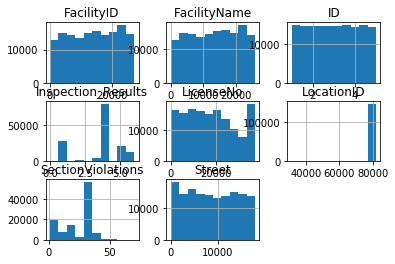

In [111]:
zf.hist()
plt.show()

In [112]:

corr_matrix = zf.corr()
print(corr_matrix["Inspection_Results"].sort_values(ascending=False))

Inspection_Results    1.000000
SectionViolations     0.250834
LocationID           -0.001862
Street               -0.004127
FacilityName         -0.004162
FacilityID           -0.004908
ID                   -0.006987
LicenseNo            -0.042021
Name: Inspection_Results, dtype: float64


In [113]:
zf.corrwith(zf['Inspection_Results'])

ID                   -0.006987
LicenseNo            -0.042021
FacilityID           -0.004908
FacilityName         -0.004162
Street               -0.004127
LocationID           -0.001862
SectionViolations     0.250834
Inspection_Results    1.000000
dtype: float64

In [114]:
cols_to_drop = [
    #'LicenseNo',
    'Date',
    #'FacilityID',
    #'FacilityName',
    #'ID'
    ]

zf = zf.drop(cols_to_drop, axis=1)
#test = test.drop(cols_to_drop, axis=1)

In [115]:
total = zf.isnull().sum().sort_values(ascending=False)
percent_1 = zf.isnull().sum()/zf.isnull().count()*100
percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
missing_data


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Total,%
City,0,0.0
FacilityID,0,0.0
FacilityName,0,0.0
Geo_Loc,0,0.0
ID,0,0.0
Inspection_Results,0,0.0
LicenseNo,0,0.0
LocationID,35,0.0
Reason,0,0.0
RiskLevel,0,0.0


In [116]:
# total = test.isnull().sum().sort_values(ascending=False)
# percent_1 = test.isnull().sum()/test.isnull().count()*100
# percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
# missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
# missing_data


In [117]:
# testf=test.copy()

In [118]:
df = zf.copy()

In [119]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
df = imp.fit_transform(df)
#testf = imp.fit_transform(testf)

In [120]:
dataframe = pd.DataFrame.from_records(df)

In [121]:
#dataframetest = pd.DataFrame.from_records(testf)

In [122]:
df.head(3)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [106]:
dataframe.head(3)

,ID,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6


In [101]:
#dataframetest.rename(columns = {0:'LocationID',1:'Type',2:'Street',3:'City',4:'State',5:'LocationID',6:'Reason',7:'SectionViolations',8:'RiskLevel',9:'Geo_Loc',10:'Inspection_Results'},inplace=True)
dataframe.rename(columns = {0:'ID',1:'LicenseNo',2:'FacilityID',3:'FacilityName',4:'Type',5:'Street',6:'City',7:'State',8:'LocationID',9:'Reason',10:'SectionViolations',11:'RiskLevel',12:'Geo_Loc',13:'Inspection_Results'
},inplace=True)

In [102]:
dataframe.head()

,ID,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations
0,4744,RESTAURANT,15522,id-11235901,id_1890134,81876,CANVASS,33,High,locid16406,4
1,2973,GROCERY STORE,3057,id-11235901,id_1890134,81862,COMPLAINT,33,High,locid878,4
2,18223,RESTAURANT,14988,id-11235901,id_1890134,81883,CANVASS,32,High,locid3368,6
3,20825,RESTAURANT,3661,id-11235901,id_1890134,81859,CANVASS RE-INSPECTION,31,Medium,locid11839,4
4,2136,RESTAURANT,7876,id-11235901,id_1890134,81886,COMPLAINT,30,High,locid12264,4


In [50]:
dataframe.head(3)

,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,Inspection_Results
0,4744,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,2973,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,18223,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,32.0,High,locid3368,6


In [51]:
dataframetest.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TestCLEANEDNEW.xlsx")
dataframe.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TrainCLEANEDNEW.xlsx")

In [72]:
df = pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TrainCLEANEDNEW.xlsx' , index_col =0)


In [53]:
test = pd.read_excel("/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TestCLEANEDNEW.xlsx" , index_col =0)

In [73]:
df.head(3)

,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,Inspection_Results.1
0,4744,RESTAURANT,15522,id-11235901,id_1890134,81876,CANVASS,33,High,locid16406,4
1,2973,GROCERY STORE,3057,id-11235901,id_1890134,81862,COMPLAINT,33,High,locid878,4
2,18223,RESTAURANT,14988,id-11235901,id_1890134,81883,CANVASS,32,High,locid3368,6


In [55]:
test['Type'].describe()

count          49148
unique           301
top       RESTAURANT
freq           34051
Name: Type, dtype: object

In [56]:
test.head(3)

,LocationID,Type,Street,City,State,LocationID.1,Reason,SectionViolations,RiskLevel,Geo_Loc
0,34218,GROCERY STORE,17352,id-11235901,id_1890134,81864,CANVASS,19,Low,locid1145
1,24597,SCHOOL,15536,id-11235901,id_1890134,81871,CANVASS,32,High,locid16450
2,1779,RESTAURANT,8849,id-11235901,id_1890134,81902,CANVASS,32,High,locid12916


In [68]:
df = pd.get_dummies(df, prefix="RiskLevel",columns=['RiskLevel'])
df = pd.get_dummies(df, prefix="City",columns=['City'])
df = pd.get_dummies(df, prefix="State",columns=['State'])
df = pd.get_dummies(df, prefix="Reason",columns=['Reason'])


In [35]:
# test = pd.get_dummies(test, prefix="RiskLevel",columns=['RiskLevel'])
# test = pd.get_dummies(test, prefix="City",columns=['City'])
# test = pd.get_dummies(test, prefix="State",columns=['State'])
# test = pd.get_dummies(test, prefix="Reason",columns=['Reason'])
# #df = pd.get_dummies(df, prefix="SectionViolations",columns=['SectionViolations'])

In [71]:
df.head(2)

,Type,Street,LocationID,SectionViolations,Geo_Loc,Inspection_Results,Inspection_Results.1,RiskLevel_1,RiskLevel_2,RiskLevel_3,...,Reason_81905,Reason_81906,Reason_81911,Reason_81951,Reason_81952,Reason_81959,Reason_82048,Reason_82049,Reason_82050,Reason_82072
0,4203,RESTAURANT,id_1890134,CANVASS,0,locid16406,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2635,GROCERY STORE,id_1890134,COMPLAINT,0,locid878,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Type']= label_encoder.fit_transform(df['Type']) 
df['Geo_Loc'] = label_encoder.fit_transform(df['Geo_Loc'])

# test['Type']= label_encoder.fit_transform(test['Type']) 
# test['Geo_Loc'] = label_encoder.fit_transform(test['Geo_Loc'])

In [39]:
df.head()

,Type,Street,LocationID,SectionViolations,Geo_Loc,Inspection_Results,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,326,15522,81876,33,6889,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,182,3057,81862,33,14998,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,326,14988,81883,32,9140,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,326,3661,81859,31,1991,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,326,7876,81886,30,2443,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier 

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

NameError: name 'X' is not defined

In [67]:
clf1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [ ]:
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)

In [ ]:
##############best dataset##############Dataset With highest accuracy

In [40]:
df.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TrainCLEANEDandONEHOT1.xlsx")
test.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TestCLEANEDandONEHOT1.xlsx")

In [17]:
df = pd.read_excel("/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/Data_TrainCLEANEDandONEHOT1.xlsx")
test = pd.read_excel("/home/ryan/stark/machinehack/Food_QUalityA_ParticipantsData/Food_QUalityA_ParticipantsData/Data_TestCLEANEDandONEHOT1.xlsx")

In [18]:
df.head()

,Type,Street,LocationID,SectionViolations,Geo_Loc,Inspection_Results,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,326,15522,81876,33,6889,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,182,3057,81862,33,14998,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,326,14988,81883,32,9140,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,326,3661,81859,31,1991,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,326,7876,81886,30,2443,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
test.head()

,Type,Street,LocationID,SectionViolations,Geo_Loc,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,City_id-11235901,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,127,17352,81864,19,1341,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,256,15536,81871,32,5812,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,234,8849,81902,32,2658,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,256,11663,81869,32,11144,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,234,16286,81874,32,6425,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
